### Import libraries and configure Settings

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
#!pip install missingno
#!pip install statsmodels

In [4]:

import scipy.stats as stats 

import warnings
warnings.filterwarnings('ignore') # To supress warnings

# set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')

import missingno as msno # to get visualization on missing values

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

import statsmodels.api as sm
print("Import Libraries --> COMPLETED")

Import Libraries --> COMPLETED


In [5]:
# reading the CSV file into pandas dataframe
cp_df = pd.read_csv("Training_Data_Set.csv")

In [6]:
cp_df.shape

(53515, 17)

In [7]:
# Check top few records to get a feel of the data structure
cp_df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.00000,compact,8,man,None,None,petrol,543764.25000
1,25002,fiat,panda,Ahmedabad,27750.00000,Third,2012,7,1242,51.00000,NaN,6,man,4,4,petrol,401819.25000
2,25003,bmw,x1,Hyderabad,46000.00000,Third,2014,5,1995,105.00000,NaN,7,auto,4,5,diesel,2392855.50000
3,25004,nissan,juke,Mumbai,43949.00000,Third,2011,8,1618,140.00000,NaN,7,man,4,5,petrol,958606.50000
4,25005,bmw,x5,Jaipur,59524.00000,Fourth & Above,2012,7,2993,180.00000,NaN,7,auto,4,5,diesel,3085561.50000


In [8]:
#get the size of dataframe
print ("Rows     : " , cp_df.shape[0])  #get number of rows/observations
print ("Columns  : " , cp_df.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", cp_df.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", cp_df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(cp_df.isna().sum() / cp_df.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", cp_df.nunique())  #  count of unique values

Rows     :  53515
Columns  :  17
######################################## 
 Features : 

 ['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type', 'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power', 'body_type', 'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count', 'fuel_type', 'Price']
######################################## 
Missing values :

 body_type              49379
engine_power            1439
Distance                1211
Id                         0
fuel_type                  0
seat_count                 0
door_count                 0
transmission               0
Vroom Audit Rating         0
engine_displacement        0
Maker                      0
Age of car                 0
manufacture_year           0
Owner Type                 0
Location                   0
model                      0
Price                      0
dtype: int64
######################################## 
Percent of missing :

 Id                     0.00000
Maker    

In [9]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

<Axes: >

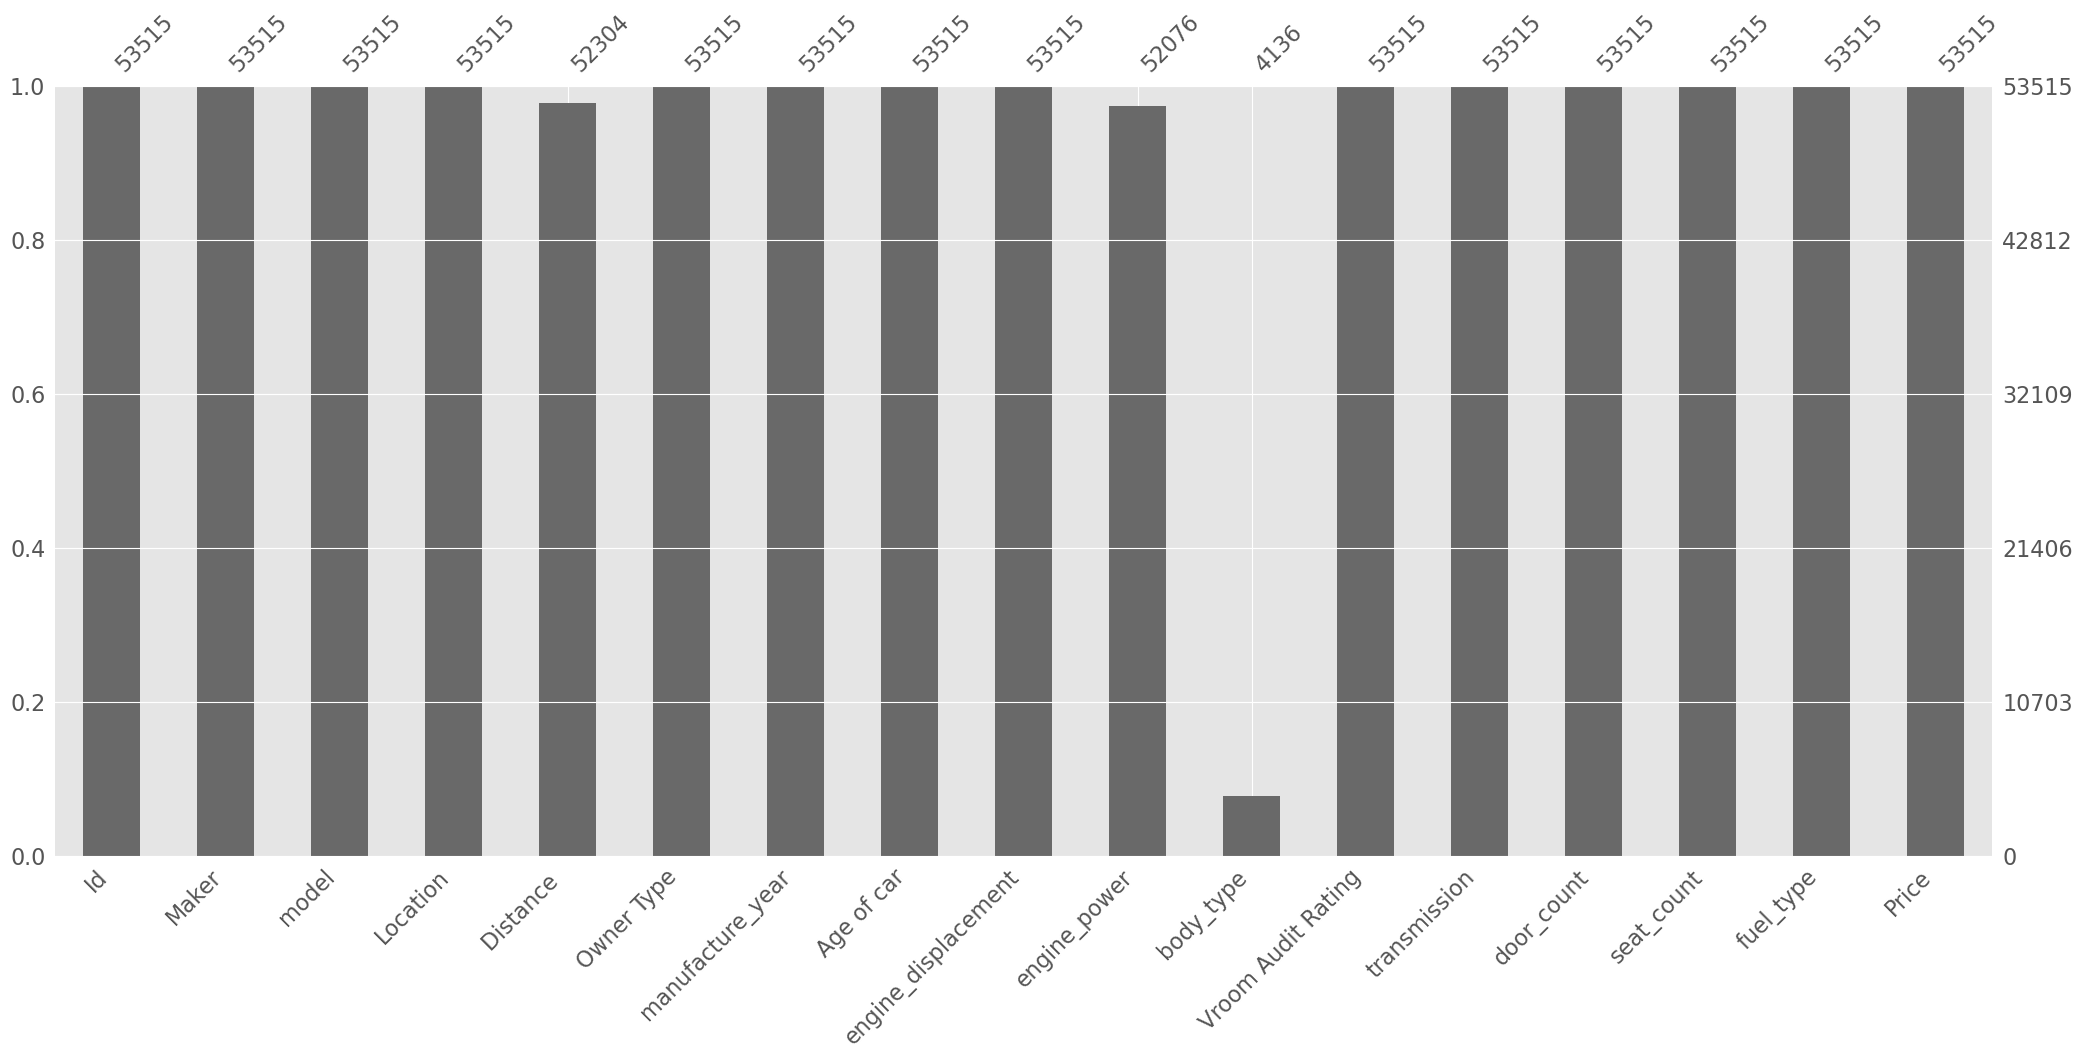

In [10]:
msno.bar(cp_df)

In [11]:
# Making a list of all categorical variables
cat_col = [
    "fuel_type",
    "Location",
    "transmission",
    "body_type",
    "Owner Type",
    "seat_count"
    
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(cp_df[column].value_counts())
    print()
    print("#" * 40)

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

########################################
Coimbatore    4976
Kochi         4969
Bangalore     4878
Jaipur        4870
Kolkata       4868
Pune          4862
Mumbai        4860
Chennai       4834
Delhi         4824
Hyderabad     4804
Ahmedabad     4770
Name: Location, dtype: int64

########################################
man     36734
auto    16781
Name: transmission, dtype: int64

########################################
compact    4127
van           9
Name: body_type, dtype: int64

########################################
First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

########################################
5       38824
None     8511
4        4467
7         852
2         725
3         109
6          23
9           2
1           1
8           1
Name: seat_count, dtype: int64

########################################


In [12]:
cp_df['manufacture_year'].value_counts()

2015    12387
2012     6250
2011     4939
2014     4877
2010     3779
2009     2914
2013     2910
2008     2859
2007     2840
2006     2018
2005     1705
2004     1341
2003      945
2001      751
2002      743
2000      727
1999      540
1998      313
2016      205
1997      141
1996       75
1994       37
1991       32
1995       31
1993       22
1992       21
1990       17
1989       13
1968       13
1988       10
1950        6
1984        6
1985        5
1973        4
1982        4
1986        4
1980        4
1983        3
1971        3
1972        2
1987        2
1962        2
1964        2
1966        2
1956        1
1952        1
1955        1
1969        1
1960        1
1959        1
1974        1
1934        1
1981        1
1976        1
1963        1
Name: manufacture_year, dtype: int64

In [13]:
cp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,53515.00000,51758.00000,15448.59416,25001.00000,38379.50000,51758.00000,65136.50000,78515.00000
Distance,52304.00000,94546.26245,275561.71614,0.00000,15490.00000,65520.00000,135641.00000,9899800.00000
manufacture_year,53515.00000,2010.40811,4.65032,1934.00000,2008.00000,2011.00000,2014.00000,2016.00000
Age of car,53515.00000,8.59189,4.65032,3.00000,5.00000,8.00000,11.00000,85.00000
engine_displacement,53515.00000,1904.04901,1496.56460,14.00000,1395.00000,1896.00000,1995.00000,32000.00000
engine_power,52076.00000,100.44834,45.33062,10.00000,73.00000,91.00000,125.00000,896.00000
Vroom Audit Rating,53515.00000,5.99837,1.41834,4.00000,5.00000,6.00000,7.00000,8.00000
Price,53515.00000,1098083.51478,844156.53073,3.00000,505181.25000,885455.25000,1477828.87500,22120775.25000


In [14]:
# Null Value Columns
cp_df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [15]:
print(cp_df.columns)  # Print out the column names
print(cp_df.dtypes)   # Print out the data types of each column

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')
Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object


In [16]:
# Replace Null Values in Column "Distance" with median distance because mean is impacted by outliers
cp_df['Distance '] = cp_df.groupby(['Maker', 'model','manufacture_year'])['Distance '].transform(lambda x: x.fillna(x.median()))

In [17]:
cp_df['Distance '].fillna(cp_df['Distance '].median(), inplace=True)

In [18]:
# Calculate median door_count grouped by Maker and model
cp_df['door_count']=cp_df['door_count'].replace({'None':np.nan})
cp_df['seat_count']=cp_df['seat_count'].replace({'None':np.nan})
cp_df['door_count'] = cp_df.groupby(['Maker', 'model'])['door_count'].transform(lambda x: x.fillna(x.median()))

In [19]:
# Calculate median seat_count grouped by Maker and model
cp_df['seat_count'] = cp_df.groupby(['Maker', 'model'])['seat_count'].transform(lambda x: x.fillna(x.median()))

In [20]:

cp_df['body_type'] = cp_df['body_type'].replace({'compact': 1, 'van': 2})


In [21]:
# Calculate median body_type grouped by Maker and model
cp_df['body_type'] = cp_df.groupby(['Maker', 'model'])['body_type'].transform(lambda x: x.fillna(x.median()))

In [22]:
# # Calculate median engine_power grouped by Maker and model
cp_df['engine_power'] = cp_df.groupby(['Maker', 'model','engine_displacement'])['engine_power'].transform(lambda x: x.fillna(x.median()))


In [23]:
# Null Value Columns replaced
cp_df.isnull().sum()

Id                       0
Maker                    0
model                    0
Location                 0
Distance                 0
Owner Type               0
manufacture_year         0
Age of car               0
engine_displacement      0
engine_power           173
body_type               38
Vroom Audit Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
Price                    0
dtype: int64

In [24]:
cp_df[cp_df['engine_power'].isnull()==True]

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
106,25107,skoda,octavia,Ahmedabad,213290.00000,Second,2000,19,157,NaN,1.00000,6,man,4.00000,5.00000,petrol,138231.00000
557,25558,skoda,octavia,Hyderabad,5173000.00000,Third,2005,14,5173,NaN,1.00000,7,man,4.00000,5.00000,petrol,469097.25000
929,25930,audi,q7,Mumbai,28350.00000,First,2014,5,28350,NaN,1.00000,6,auto,4.00000,5.00000,petrol,3460770.00000
1225,26226,skoda,octavia,Delhi,184800.00000,Fourth & Above,2005,14,2500,NaN,1.00000,5,man,4.00000,5.00000,petrol,416080.50000
1589,26590,skoda,roomster,Bangalore,1169800.00000,First,2011,8,11169,NaN,1.00000,7,man,4.00000,5.00000,petrol,416080.50000
1738,26739,skoda,yeti,Hyderabad,114000.00000,Third,2010,9,14000,NaN,1.00000,7,man,4.00000,5.00000,diesel,804681.75000
2922,27923,skoda,octavia,Mumbai,120739.00000,Second,2011,8,17140,NaN,1.00000,7,auto,4.00000,5.00000,petrol,968727.00000
3947,28948,bmw,x3,Hyderabad,178053.00000,Second,2005,14,5300,NaN,1.00000,6,auto,4.00000,5.00000,petrol,552368.25000
4051,29052,toyota,avensis,Pune,5190000.00000,Third,2005,14,5190,NaN,1.00000,4,auto,4.00000,5.00000,petrol,324759.75000
4098,29099,bmw,x3,Jaipur,90500.00000,First,2011,8,11100,NaN,1.00000,5,auto,4.00000,5.00000,petrol,2439859.50000


In [25]:
cp_df[cp_df['body_type'].isnull()==True]

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
2073,27074,maserati,coupe,Ahmedabad,41000.00000,Third,2002,17,4244,287.00000,NaN,4,auto,2,4,petrol,2138766.00000
2140,27141,maserati,coupe,Bangalore,41000.00000,Third,2002,17,4244,287.00000,NaN,8,auto,2,4,petrol,2138133.00000
4229,29230,maserati,coupe,Kolkata,65743.00000,Second,2002,17,4244,287.00000,NaN,6,auto,2,4.00000,petrol,1950866.25000
4394,29395,maserati,coupe,Chennai,41000.00000,First,2002,17,4244,287.00000,NaN,8,auto,2,4,petrol,2138529.75000
5056,30057,maserati,coupe,Delhi,41000.00000,Second,2002,17,4244,287.00000,NaN,8,auto,2,4,petrol,2137658.25000
6913,31914,maserati,coupe,Jaipur,41000.00000,Fourth & Above,2002,17,4244,287.00000,NaN,6,auto,2,4,petrol,2137738.50000
7355,32356,maserati,coupe,Bangalore,41000.00000,Second,2002,17,4244,287.00000,NaN,8,auto,2,4,petrol,2138133.00000
9078,34079,maserati,coupe,Bangalore,41000.00000,Second,2002,17,4244,287.00000,NaN,8,auto,2,4,petrol,2138688.00000
12219,37220,maserati,coupe,Pune,72000.00000,Fourth & Above,2004,15,4244,287.00000,NaN,8,auto,2,4,petrol,2167821.75000
12817,37818,maserati,coupe,Coimbatore,90000.00000,Third,2003,16,4244,287.00000,NaN,7,auto,2,4.00000,petrol,1342699.50000


In [26]:
cp_df['body_type'].fillna(cp_df['body_type'].median(), inplace=True)

In [27]:
cp_df['engine_power'].fillna(cp_df['engine_power'].median(), inplace=True)

In [28]:
# Null Value Columns replaced
cp_df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
body_type              0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [29]:
#cp_df['Location'] = cp_df['Location'].replace({'Ahmedabad': 1, 'Bangalore': 2, 'Chennai': 3, 'Coimbatore': 4, 'Delhi': 5, 'Hyderabad': 6, 'Jaipur': 7, 'Kochi': 8, 'Kolkata': 9, 'Mumbai': 10, 'Pune': 11})

cp_df['Owner Type'] = cp_df['Owner Type'].replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4})


In [30]:

#  Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
cp_df['Location'] = cp_df['Location'].replace({'Ahmedabad': 1, 'Bangalore': 2, 'Chennai': 3, 'Coimbatore': 4, 'Delhi': 5, 'Hyderabad': 6, 'Jaipur': 7, 'Kochi': 8, 'Kolkata': 9, 'Mumbai': 10, 'Pune': 11})


In [31]:
cp_df['transmission'] = cp_df['transmission'].replace({'man': 0, 'auto': 1})


In [32]:
cp_df['fuel_type'] = cp_df['fuel_type'].replace({'diesel': 0, 'petrol': 1})

In [33]:
cp_df['Maker']=cp_df['Maker'].replace({'skoda':1,'toyota':2,'audi':3,'bmw':4,'nissan':5,'hyundai':6,'fiat':7,'maserati':8})

In [34]:
cp_df['model']=cp_df['model'].replace({ 'octavia':1,'superb':2,'yaris' :3,'qashqai' :4,'x3' :5,'x1' :6,'i30' :7,'q5' :8,'x5':9,'yeti' :10,'panda' :11,'q3' :12,'coupe' :13,'micra' :14,'auris' :15,'avensis' :16,'aygo' :17,'rapid' :18,'roomster': 19,'q7' :20,'citigo':21,'juke' :22,'tt' :23})


In [35]:
cp_df.head(10)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,1,1,1,68000.00000,2,1964,55,1964,147.00000,1.00000,8,0,4.00000,5.00000,1,543764.25000
1,25002,7,11,1,27750.00000,3,2012,7,1242,51.00000,1.00000,6,0,4,4,1,401819.25000
2,25003,4,6,6,46000.00000,3,2014,5,1995,105.00000,1.00000,7,1,4,5,0,2392855.50000
3,25004,5,22,10,43949.00000,3,2011,8,1618,140.00000,1.00000,7,0,4,5,1,958606.50000
4,25005,4,9,7,59524.00000,4,2012,7,2993,180.00000,1.00000,7,1,4,5,0,3085561.50000
5,25006,1,1,3,12015.00000,1,2015,4,1968,110.00000,1.00000,4,0,4,5,0,1543728.75000
6,25007,1,2,4,181000.00000,4,2009,10,1968,125.00000,1.00000,6,1,5,5,0,915985.50000
7,25008,7,11,3,33100.00000,2,2010,9,1108,40.00000,1.00000,5,0,5,5,1,327535.50000
8,25009,5,4,4,17375.00000,1,2015,4,1600,96.00000,1.00000,5,0,4,5,0,1361480.25000
9,25010,1,2,10,97640.00000,4,2010,9,2000,103.00000,1.00000,6,0,5,5,0,885455.25000


In [36]:
print(cp_df.dtypes)   # Print out the data types of each column

Id                       int64
Maker                    int64
model                    int64
Location                 int64
Distance               float64
Owner Type               int64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type              float64
Vroom Audit Rating       int64
transmission             int64
door_count              object
seat_count              object
fuel_type                int64
Price                  float64
dtype: object


In [37]:
cp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,53515.00000,51758.00000,15448.59416,25001.00000,38379.50000,51758.00000,65136.50000,78515.00000
Maker,53515.00000,2.65378,1.76879,1.00000,1.00000,2.00000,4.00000,8.00000
model,53515.00000,8.16422,6.70887,1.00000,2.00000,6.00000,13.00000,23.00000
Location,53515.00000,6.00975,3.15712,1.00000,3.00000,6.00000,9.00000,11.00000
Distance,53515.00000,95941.01515,272691.40741,0.00000,16452.50000,68000.00000,139000.00000,9899800.00000
Owner Type,53515.00000,2.49868,1.11800,1.00000,1.00000,2.00000,3.00000,4.00000
manufacture_year,53515.00000,2010.40811,4.65032,1934.00000,2008.00000,2011.00000,2014.00000,2016.00000
Age of car,53515.00000,8.59189,4.65032,3.00000,5.00000,8.00000,11.00000,85.00000
engine_displacement,53515.00000,1904.04901,1496.56460,14.00000,1395.00000,1896.00000,1995.00000,32000.00000
engine_power,53515.00000,100.26750,44.87666,10.00000,73.00000,91.00000,125.00000,896.00000


In [38]:
#sns.pairplot(cp_df, diag_kind='kde')

In [39]:
# reading the CSV file into pandas dataframe
cp_test_df = pd.read_csv("Test_Data_Set.csv")

In [40]:

# Calculate median Distance grouped by Maker, model and manufacture_year
cp_test_df['Distance '] = cp_test_df.groupby(['Maker', 'model','manufacture_year'])['Distance '].transform(lambda x: x.fillna(x.median()))

# Replace Null Values in Column "Distance" with median distance because mean is impacted by outliers
cp_test_df['Distance '].fillna(cp_test_df['Distance '].median(), inplace=True)

cp_test_df['door_count']=cp_test_df['door_count'].replace({'None':np.nan})
# Calculate median door_count grouped by Maker and model
cp_test_df['door_count'] = cp_test_df.groupby(['Maker', 'model'])['door_count'].transform(lambda x: x.fillna(x.median()))

cp_test_df['seat_count']=cp_test_df['seat_count'].replace({'None': np.nan})
# Calculate median seat_count grouped by Maker and model
cp_test_df['seat_count'] = cp_test_df.groupby(['Maker', 'model'])['seat_count'].transform(lambda x: x.fillna(x.median()))


# Replace compact and van Values in Column "body_type" with "1" and "2" respectively
cp_test_df['body_type'] = cp_test_df['body_type'].replace({'compact': 1, 'van': 2})


# Calculate median body_type grouped by Maker and model
cp_test_df['body_type'] = cp_test_df.groupby(['Maker', 'model'])['body_type'].transform(lambda x: x.fillna(x.median()))


cp_test_df['body_type'].fillna(cp_test_df['body_type'].median(), inplace=True)


# # Calculate median engine_power grouped by Maker and model
cp_test_df['engine_power'] = cp_test_df.groupby(['Maker', 'model','engine_displacement'])['engine_power'].transform(lambda x: x.fillna(x.median()))


cp_test_df['engine_power'].fillna(cp_test_df['engine_power'].median(), inplace=True)


cp_test_df['Owner Type'] = cp_test_df['Owner Type'].replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4})

#  Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
cp_test_df['Location'] = cp_test_df['Location'].replace({'Ahmedabad': 1, 'Bangalore': 2, 'Chennai': 3, 'Coimbatore': 4, 'Delhi': 5, 'Hyderabad': 6, 'Jaipur': 7, 'Kochi': 8, 'Kolkata': 9, 'Mumbai': 10, 'Pune': 11})


cp_test_df['transmission'] = cp_test_df['transmission'].replace({'man': 0, 'auto': 1})


cp_test_df['fuel_type'] = cp_test_df['fuel_type'].replace({'diesel': 0, 'petrol': 1})


cp_test_df['Maker']=cp_test_df['Maker'].replace({'skoda':1,'toyota':2,'audi':3,'bmw':4,'nissan':5,'hyundai':6,'fiat':7,'maserati':8})

cp_test_df['model']=cp_test_df['model'].replace({ 'octavia':1,'superb':2,'yaris' :3,'qashqai' :4,'x3' :5,'x1' :6,'i30' :7,'q5' :8,'x5':9,'yeti' :10,'panda' :11,'q3' :12,'coupe' :13,'micra' :14,'auris' :15,'avensis' :16,'aygo' :17,'rapid' :18,'roomster': 19,'q7' :20,'citigo':21,'juke' :22,'tt' :23})

In [41]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = cp_df.drop('Price', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = cp_df[['Price']]

In [42]:
X_cp_test = cp_test_df

In [43]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,25001,1,1,1,68000.00000,2,1964,55,1964,147.00000,1.00000,8,0,4.00000,5.00000,1
1,25002,7,11,1,27750.00000,3,2012,7,1242,51.00000,1.00000,6,0,4,4,1
2,25003,4,6,6,46000.00000,3,2014,5,1995,105.00000,1.00000,7,1,4,5,0
3,25004,5,22,10,43949.00000,3,2011,8,1618,140.00000,1.00000,7,0,4,5,1
4,25005,4,9,7,59524.00000,4,2012,7,2993,180.00000,1.00000,7,1,4,5,0


In [44]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Id is -0.07301882818539611
The coefficient for Maker is 21213.29917192771
The coefficient for model is 3311.8095955553104
The coefficient for Location is -783.8876965085025
The coefficient for Distance  is -0.1714281362603043
The coefficient for Owner Type is -4601.339148347312
The coefficient for manufacture_year is 39833.223901218174
The coefficient for Age of car is -39833.22390121751
The coefficient for engine_displacement is 3.465659857809845
The coefficient for engine_power is 8690.88351605568
The coefficient for body_type is 123394.93904655936
The coefficient for Vroom Audit Rating is 1389.662204324385
The coefficient for transmission is 318025.03526326554
The coefficient for door_count is -114420.18860474353
The coefficient for seat_count is 60544.6185891456
The coefficient for fuel_type is -200448.86307331486


In [46]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -79542346.8966193


In [47]:
# we can write our linear model as:
# Y=−21.11–0.35×X1+0.03×X2–0.02×X3–0.01×X4+0.12×X5+0.85×X6–1.90×X7+0.74×X8+1.16×X9

In [48]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.6774681377873011

In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Ridge model: [[-7.30509852e-02  2.12134799e+04  3.31193974e+03 -7.83755377e+02
  -1.71425448e-01 -4.60108953e+03  3.98332554e+04 -3.98332557e+04
   3.46595839e+00  8.69097905e+03  1.18295273e+05  1.38998470e+03
   3.18009936e+05 -1.14410900e+05  6.05359858e+04 -2.00440683e+05]]
Lasso model: [-7.30222917e-02  2.12132879e+04  3.31182572e+03 -7.83861871e+02
 -1.71427878e-01 -4.60123371e+03  7.96664361e+04 -3.38875079e-12
  3.46567279e+00  8.69088725e+03  1.22856156e+05  1.38964814e+03
  3.18024554e+05 -1.14419151e+05  6.05433777e+04 -2.00448346e+05]


In [50]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6570879904689634
0.6774685430762659


In [51]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6570879972528183
0.6774681782178849


In [52]:
# So the model explains 67% of the variability in Y using X

In [53]:
#  Iteration -2 

#Since on many dimensions, the relationship is not really linear, let us try polynomial models (quadratic)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

# X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

# y_pred = poly_clf.predict(X_test_)

#print(y_pred)

print(poly_clf.score(X_train_, y_train))

0.874426574128732


In [55]:
X_test_ = poly.fit_transform(X_cp_test)

y_pred = poly_clf.predict(X_test_)

output = pd.DataFrame({"Id":X_cp_test["Id"], "Price": y_pred.flatten()})

# output = pd.DataFrame({"Price":y_pred})
output.to_csv('Sample_Submission_Poly_4degree.csv',index=False)


In [56]:
print(X_test_.shape)

(5615, 2517)


In [57]:
print(X.shape)
print(X_train_.shape)
poly

(53515, 16)
(37460, 2517)


PolynomialFeatures(degree=4, interaction_only=True)

In [58]:
# Randon Forest Model prediction steps

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=32, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, y)
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
predictions = regressor.predict(X)
# Evaluating the model
mse = mean_squared_error(y, predictions)

Out-of-Bag Score: 0.9197836990690414


In [59]:
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8647313621.694277


In [60]:
print(f'Root Mean Squared Error: {math.sqrt(mse)}')

Root Mean Squared Error: 92990.93300797814


In [61]:
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9878649000878308


In [62]:
rf_y = regressor.predict(X_cp_test)

In [63]:


output = pd.DataFrame({"Id": X_cp_test["Id"], "Price": rf_y.flatten()})

# output = pd.DataFrame({"Price":y_pred})
output.to_csv('Sample_Submission_RF.csv',index=False)


In [64]:
#Decision Tree Model prediction steps

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model=DecisionTreeRegressor(criterion='squared_error')
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)  # performance on test data

predictions=model.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22223973900.971558


In [65]:
print(f'Root Mean Squared Error: {math.sqrt(mse)}')

Root Mean Squared Error: 149077.0736933468


In [66]:
r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9688122629139835


In [67]:
dt_y = model.predict(X_cp_test)


In [68]:
X_cp_test["Id"]

0       11001
1       11002
2       11003
3       11004
4       11005
        ...  
5610    16611
5611    16612
5612    16613
5613    16614
5614    16615
Name: Id, Length: 5615, dtype: int64

In [69]:

output = pd.DataFrame({"Id": X_cp_test["Id"], "Price": dt_y.flatten()})
output
#output = pd.DataFrame({"Price":y_pred})
output.to_csv('Sample_Submission_DT.csv',index=False)


In [70]:
#Hyper parameter tuning for Random SEarch GRid
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 


grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 


KeyboardInterrupt: 

In [ ]:
# Randon Forest Model prediction steps using hyper parameter

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
RandomForestRegressor(max_depth=9, max_features='log2', max_leaf_nodes=9,
                      n_estimators=150,  random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, y)
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
predictions = regressor.predict(X)
# Evaluating the model
mse = mean_squared_error(y, predictions)

print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

In [ ]:
rf_y = regressor.predict(X_cp_test)
output = pd.DataFrame({"Id": X_cp_test["Id"], "Price": rf_y.flatten()})

#output = pd.DataFrame({"Price":y_pred})

output.to_csv('Sample_Submission_RF_GRidHyper.csv',index=False)


In [ ]:
#Hyper parameter tuning for Random SEarch GRid
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

# Define the model and the hyperparameter 
# search space 
model = RandomForestRegressor() 
param_grid = { 
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': np.linspace(0.1, 1, 11), 
    'bootstrap': [True, False] 
} 

# Use RandomizedSearchCV to sample 
# from the search space and fit the model 
random_search = RandomizedSearchCV( 
model, 
param_grid, 
cv=5, 
n_iter=10, 
random_state=42) 
random_search.fit(X, y) 


In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5) 
grid_search.fit(X, y) 
  
# Print the best hyperparameters found by each method 
print(f"Best hyperparameters found by RandomizedSearchCV: {random_search.best_params_}") 
print(f"Best hyperparameters found by GridSearchCV: {grid_search.best_params_}")

In [ ]:
random_search.best_params_

In [ ]:
# Randon Forest Model prediction steps using hyper parameter with RandomSearch

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
RandomForestRegressor(n_estimators=10, min_samples_split='0.28', max_depth=5,
                     bootstrap=False, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X, y)
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
predictions = regressor.predict(X)
# Evaluating the model
mse = mean_squared_error(y, predictions)

print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

In [ ]:
rf_y = regressor.predict(X_cp_test)
output = pd.DataFrame({"Id": X_cp_test["Id"], "Price": rf_y.flatten()})

#output = pd.DataFrame({"Price":y_pred})

output.to_csv('Sample_Submission_RF_RanGRidHyper.csv',index=False)


In [71]:
# Trying Neural Network Regression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Standardize the data
PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()
X = PredictorScaler.fit_transform(X)
y = TargetVarScaler.fit_transform(y)

# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X)

# Inverse transform predictions to get actual prices
predicted_prices = TargetVarScaler.inverse_transform(predictions)

#nueral_y = model.predict(X_cp_test)
#output = pd.DataFrame({"Id": X_cp_test["Id"], "Price": nueral_y.flatten()})



Epoch 1/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3435 - val_loss: 0.1632
Epoch 2/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 0.1249 - val_loss: 0.1254
Epoch 3/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1026 - val_loss: 0.1162
Epoch 4/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - loss: 0.0917 - val_loss: 0.1304
Epoch 5/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.0858 - val_loss: 0.1082
Epoch 6/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - loss: 0.1166 - val_loss: 0.1058
Epoch 7/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0773 - val_loss: 0.1111
Epoch 8/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - loss: 0.0783 - val_loss: 0.1043
Epoch 9/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 0.0719 - val_loss: 0.1025
Epoch 10/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 0.0904 - val_loss: 0.1037
Epoch 11/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.0799 - val_loss: 0.1021
Epo

1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0745 - val_loss: 0.0908
Epoch 67/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0700 - val_loss: 0.0963
Epoch 68/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0665 - val_loss: 0.0926
Epoch 69/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 0.0634 - val_loss: 0.0921
Epoch 70/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 0.1003 - val_loss: 0.0924
Epoch 71/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 0.0510 - val_loss: 0.0937
Epoch 72/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.0596 - val_loss: 0.0931
Epoch 73/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 0.0582 - val_loss: 0.0909
Epoch 74/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 0.0531 - val_loss: 0.0937
Epoch 75/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 0.0776 - val_loss: 0.0946
Epoch 76/100
1338/1338 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - loss: 0.1331 - val_loss: 0.0908
Epoch 7

In [72]:

X_cp_test_Transformed = PredictorScaler.fit_transform(X_cp_test)
X_cp_test_Transformed
#output = pd.DataFrame({"Id": X_cp_test["Id"], "Price": nueral_y.flatten()})

array([[-1.73174237, -0.93295756, -1.06547417, ...,  0.03967578,
         0.21748532,  1.02726378],
       [-1.73112543, -0.93295756,  1.46204483, ...,  0.03967578,
         0.21748532, -0.97345981],
       [-1.73050849, -0.93295756, -1.06547417, ...,  1.50533031,
         0.21748532, -0.97345981],
       ...,
       [ 1.73050849, -0.93295756, -1.06547417, ...,  1.50533031,
         0.21748532, -0.97345981],
       [ 1.73112543,  1.30096853, -0.61944141, ...,  0.03967578,
         3.83044409,  1.02726378],
       [ 1.73174237,  1.85945006, -0.17340864, ...,  0.03967578,
         0.21748532,  1.02726378]])

In [73]:
nueral_y = model.predict(X_cp_test_Transformed)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step


In [74]:
nueral_y

array([[-0.76260114],
       [-0.09097168],
       [ 0.46546197],
       ...,
       [-0.86903906],
       [ 0.03487174],
       [-0.6244792 ]], dtype=float32)

In [76]:
predicted_prices = TargetVarScaler.inverse_transform(nueral_y)

In [77]:
predicted_prices

array([[ 454334.8 ],
       [1021289.9 ],
       [1491002.6 ],
       ...,
       [ 364485.38],
       [1127520.5 ],
       [ 570930.25]], dtype=float32)

In [78]:
output = pd.DataFrame({"Id": X_cp_test["Id"], "Price": predicted_prices.flatten()})

In [79]:
output.to_csv('Sample_Submission_Nueral.csv',index=False)